### <div class="alert-info"> 0. Librerías

In [1]:
import pandas as pd
import openpyxl

### <div class="alert-info"> 1. Introducción al análisis - Fuentes de Información

Como parte del análisis de perfilamiento de individuos, se ha recibido la siguiente información de CNC:
- Resultados de la encuesta de campo de apropiación digital 2012 - CNC (Archivo xlsx)
- Resultados de la encuesta de campo de apropiación digital 2013 - CNC (Archivo xlsx)
- Resultados de la encuesta de campo de apropiación digital 2016 - CNC (Archivo xlsx)
- Resultados de la encuesta de campo de apropiación digital 2018 - CNC (Archivo xlsx)
- Resultados de la encuesta de campo de apropiación digital 2023 - CNC (Archivo xlsx)

De otro lado, también se tiene data de fuente externa que se cita a continuación:
- Resultados de Prueba Saber 11 (2010 a 20224) - Consulta de datos abiertos accesible vía API / Descarga de archivo CSV.
- Encuesta Nacional de Hogares DANE (2024) - Descarga de archivo CSV.

En este punto siendo que lo que se busca es apoyar al CNC a segmentar de forma idónea a los individuos de acuerdo a sus características así como del nivel de apropiación digital en sus diversas dimensiones (uso, frecuencia, accesibilidad, entre otras) se vio por conveniente solo usar:
- Resultados de la encuesta de campo de apropiación digital 2023 - CNC (Archivo xlsx)
Cabe precisar que, posteriormente se podrá evaluar la pertinencia de agregar otras fuentes de información al análisis, en tanto tenga el mismo nivel de granularidad.

### <div class="alert-info"> 2. Carga de datos

In [2]:
df_encuesta = pd.read_excel('datos.xlsx')
df_encuesta

### Análisis 

Se observa que los resultados provienen de una encuesta aplicada a 4,179 hogares, generando un total de 1,173 columnas que incluyen las respuestas obtenidas y otros datos asociados. Durante esta primera evaluación, identificamos que la estructura del conjunto de datos refleja cómo las respuestas de varios individuos por hogar se expanden en múltiples columnas, sumándose también las opciones de respuesta para cada alternativa dada, lo que incrementa aún más el número de columnas.

Por lo tanto, consideramos como primer paso realizar un análisis detallado de las variables descritas en la encuesta (PDF) para comprender su contexto y significado. A partir de este entendimiento, se procederá a una selección inicial de variables relevantes, que serán evaluadas en términos de calidad de datos considerando dimensiones clave como totalidad, consistencia, claridad, formato y su concordancia con el problema de negocio planteado.

### <div class="alert-info"> 3. Calidad y limpieza de datos

#### 3.1. Selección inicial de variables

In [3]:
df_encuesta_respaldo = df_encuesta.copy()

In [4]:
#Eliminamos variables que en primera instancia identificamos que no son importantes para el análisis

#Todos los registros tienen un mismo valor
# CONTACTO, AUX99, AUX99_1, IDEND, TIPO_ENCUESTA, TIPO, ESTADO, ESTUDIO, ID, ID_CONTACTO, IDIOMA, TIPO_ENCUESTA

# No necesitamos los datos de contacto
# TELEFONO, EMAIL, DIRECCION_FILTRO, 'CEDULA','CELULAR'

# No requerimos los ids de identificacion, ni metadata de la encuesta
# IDGUID, IDGUIDCONTACTO, IDGUIDREC, IDAPK,
# IDDEVICE, IDBROWSER,  IDIP, IDMODE, IDMODEL, IDSCREEN, 
# IDSO, IDPPI, IDVERSO, IDVERSION, N_ENCUESTA, ID_MANZANA, ID_MANZ_AUX,
# VEREDA, PFECACT, PERSONA_SELECCIONADA,NOMBRE_SEL,GENERO_SEL,EDAD,
# CONTINUAR,REDAD,AUTORIZA_INI_MAYOR,CONTINUAR_1,AUTORIZA_INI_MENOR,NOM_ADULTO,
# RELACION_MENOR,PARTICIPA_MENOR,REEMPLAZO,P2E_REEMPLAZO,AUTORIZA_INI_MAYOR_1,CONTINUAR_1_1,
# AUTORIZA_INI_MENOR_1,NOM_ADULTO_1,RELACION_MENOR_1,PARTICIPA_MENOR_1, 'DANE', ENTREVISTADOR, IDCOORD,
# FECHAINI, HORAINI, FECHAFIN, HORAFIN, DURACION

# Información personal irrelevante
# MUNICIPIO_DEC, 'B4_4_1', 'B4_4_2', 'B4_4_3', 'GPSVAL', 'GPSALT', 'GPSLONG', 'GPSLAT', 'GPSPRECISION', 'IDVERBROWSER', 'IDUSUARIO', 'LONG_1', 'LAT_1': Variable duplicada de otra variable
# NOMBRE_n, PDIA_n, PMES_n, PFEC_n, B3_NOMBRES_n, SEXO_n, EDAD_n,
# 'NOM_ENTRE','TEL_ENTRE','CEL_ENTRE','DIR_ENTRE','BAR_ENTRE','ST_DEC','ESTRATO'

# Informacion muy especifica
#  'Unnamed:276','B4_3','B4_3_OTRO', 'B4_4_TOTAL', 'B4_5_1', 'B4_5_2', 'B4_5_3', 'B4_5_4', 'B4_5_5',
# 'B4_6_1','B4_6_2','B4_6_3','B4_6_51','B4_6_6','B4_6_7','B4_6_8',\n'B4_6_9','B4_6_10','B4_6_11','B4_6_12','B4_6_13','B4_6_14',\n'B4_6_15','B4_6_49','B4_6_16','B4_6_17','B4_6_18','B4_6_19',\n'B4_6_20','B4_6_21','B4_6_22','B4_6_23','B4_6_24','B4_6_25',\n'B4_6_26','B4_6_27','B4_6_29','B4_6_30','B4_6_32','B4_6_33',\n'B4_6_34','B4_6_35','B4_6_36','B4_6_37','B4_6_38','B4_6_39',\n'B4_6_40','B4_6_41','B4_6_42','B4_6_43','B4_6_44','B4_6_45',\n'B4_6_46','B4_6_47','B4_6_48','B4_6_50','B4_6_66','B4_6_52',\n'B4_6_53',
# 'B4_6_54','B4_6_55','B4_6_56','B4_6_57','B4_6_58','B4_6_59','B4_6_60','B4_6_61','B4_6_62','B4_6_64','B4_7', 'CB5_5', 'B5_5', 'B5_11','B5_11_OTRA',
# 'B6_1_OTRO', 'B6_4','B64_OTRO', 'B7_2', 'B7_3M', 'B7_4','B7_5M', 'B8_3_1','B8_3_2','B8_3_3','B8_3_4','B8_3_5','B8_3_6','B8_3_7','B8_3_8','B8_3_9','B8_3_10','B8_3_11','B8_3_12', 'B9_2',
# 'B9_5_1','B9_5_2','B9_5_3', 'B9_6','B9_6_OTRO', 'B10_2','B10_2B', 'B10_3H','B10_3M','B10_4','B10_5H','B10_5M', 
# 'B10_6_1','B10_6_2','B10_6_3','B10_6_4','B10_6_5','B10_6_6','B10_6_7','B10_6_8','B10_6_9','B10_6_10','B10_6_26','B10_6_19','B10_6_20','B10_6_21','B10_6_22','B10_6_23','B10_6_24','B10_6_25','B10_7_1','B10_7_2','B10_7_3','B10_7_4','B10_7_5','B10_7_6','B10_7_7','B10_7_8','B10_7_9','B10_7_10','B10_7_26','B10_7_19','B10_7_20','B10_7_21','B10_7_22','B10_7_23','B10_7_24','B10_7_25','B10_8_1','B10_8_2','B10_8_3','B10_8_4','B10_8_5','B10_8_6','B10_8_7','B10_8_8','B10_8_9','B10_8_10','B10_8_26','B10_8_19','B10_8_20','B10_8_21'
# 'B10_13_1','B10_13_2','B10_13_3','B10_13_4','B10_13_5','B10_13_6','B10_13_7','B10_13_8','B10_13_9','B10_13_10','B10_13_26','B10_13_19','B10_13_20','B10_13_21','B10_13_22','B10_13_23','B10_13_24', 'B10_13_25'
# 'B10_14_1','B1014_OT_1','B10_14_2','B1014_OT_2','B10_14_3','B1014_OT_3','B10_14_4','B1014_OT_4','B10_14_5','B1014_OT_5','B10_14_6','B1014_OT_6','B10_14_7','B1014_OT_7','B10_14_8','B1014_OT_8','B10_14_9','B1014_OT_9','B10_14_10','B1014_OT_10','B10_14_26','B1014_OT_26','B10_14_19','B1014_OT_19','B10_14_20','B1014_OT_20','B10_14_21','B1014_OT_21','B10_14_22','B1014_OT_22','B10_14_23','B1014_OT_23','B10_14_24','B1014_OT_24','B10_14_25','B1014_OT_25',
# 'B10_15_1','B10_15_2','B10_15_3','B10_15_4','B10_15_5','B10_15_6','B10_15_7','B10_15_8','B10_15_9','B10_15_10','B10_15_26','B10_15_19','B10_15_20','B10_15_21','B10_15_22','B10_15_23','B10_15_24','B10_15_25'
# 'B10_16_1','B10_16_2','B10_16_3','B10_16_4','B10_16_5','B10_16_6','B10_16_7','B10_16_8','B10_16_9','B10_16_10','B10_16_26','B10_16_19','B10_16_20','B10_16_21','B10_16_22','B10_16_23','B10_16_24','B10_16_25'
# 'CB10_17_1','B10_17_1','CB10_17_2','B10_17_2','CB10_17_3','B10_17_3','CB10_17_4','B10_17_4','CB10_17_5','B10_17_5','CB10_17_6','B10_17_6','CB10_17_7','B10_17_7','CB10_17_8','B10_17_8','CB10_17_9','B10_17_9','CB10_17_10','B10_17_10','CB10_17_26','B10_17_26','CB10_17_19','B10_17_19','CB10_17_20','B10_17_20','CB10_17_21','B10_17_21','CB10_17_22','B10_17_22','CB10_17_23','B10_17_23','CB10_17_24','B10_17_24','CB10_17_25','B10_17_25'
# 'B11_1_OTRO','B11_2_1','CB11_2_COOP_1','B11_2_COOP_1','B11_2_OTRO_1','B11_2_2','CB11_2_COOP_2','B11_2_COOP_2','B11_2_OTRO_2','B11_2_3','CB11_2_COOP_3','B11_2_COOP_3','B11_2_OTRO_3','B11_2_4','CB11_2_COOP_4','B11_2_COOP_4','B11_2_OTRO_4','B11_2_5','CB11_2_COOP_5','B11_2_COOP_5','B11_2_OTRO_5','B11_2_6','CB11_2_COOP_6','B11_2_COOP_6','B11_2_OTRO_6','B11_2_7','CB11_2_COOP_7','B11_2_COOP_7','B11_2_OTRO_7','B11_2_77','CB11_2_COOP_77','B11_2_COOP_77','B11_2_OTRO_77'
# 'B11_5_OTRO','B11_6','CB11_7_1','B11_7_1','CB11_7_2','B11_7_2','CB11_7_3','B11_7_3','CB11_7_4','B11_7_4','CB11_7_5','B11_7_5','CB11_7_6','B11_7_6','CB11_7_7','B11_7_7','CB11_7_8','B11_7_8','CB11_7_9','B11_7_9','CB11_7_10','B11_7_10','CB11_7_11','B11_7_11'
# 'B10_18','B10_19'
# 'B11_8','B11_8_OTRO','B11_9'
# 'CB11_10_1','B11_10_1','CB11_10_2','B11_10_2','CB11_10_3','B11_10_3','CB11_10_4','B11_10_4','CB11_10_5','B11_10_5','CB11_10_6','B11_10_6','CB11_10_7','B11_10_7','CB11_10_8','B11_10_8','CB11_10_9','B11_10_9','CB11_10_10','B11_10_10','CB11_10_11','B11_10_11'
# 'B11_12_OTRO', 'B11_11_OTRO'
# ,'B12_3_OTRO', 'B12_1_OTRO', 'B12_3A','B12_3_OTRO','TB12_3_1','TB12_3_2','TB12_3_3','TB12_3_4','TB12_3_5','TB12_3_6','TB12_3_7','TB12_3_8','TB12_3_9','TB12_3_10','TB12_3_11','TB12_3_12','TB12_3_13','TB12_3_14','TB12_3_15','TB12_3_16'
# 'B12_4_1','B12_4_2','B12_4_3','B12_4_4', 'B12_5_OTRO',
# 'B13_3L','CORREO',
# 'B14_1L', 'B14_3', 'B15_3L', 'B16_1_OTRO', 'B16_2'
# 'B16_3_1','B16_3_2','B16_3_3','B16_3_4','B16_3_5','B16_3_8','B16_3_10','B16_3_12','B16_3_15','B16_3_26','B16_3_27','B16_3_29','B16_3_30','B16_3_31','B16_3_33','B16_3_32','B16_3_77'
# 'B16_4_1','B16_4_2','B16_4_3','B16_4_4','B16_4_5'
# 'B16_5','B16_6','B16_6_OTRO'
# 'B17_1','B17_1_OTRO','B17_2','B17_2_OTRO','B17_3','B17_4','B17_5','B17_6','B17_7','B17_8','B17_9','B17_10','B17_11_1','B17_11_2','B17_11_3','B17_11_4','B17_11_5','B17_11_6','B17_11_7','B17_11_8','B17_11_9','B17_11_10','B17_11_11'
# 'B18_1','MAYOR_B18_1','B18_2','B18_3'
# 'B20_1','B20_2','B20_2_OTRO','B20_4_1','B20_4_2','B20_4_3','B20_5_1','B20_5_2','B20_5_3','B20_6_1','B20_6_2','B20_6_3','B20_6_4','B20_6_5','B20_6_6','B20_7_1','B20_7_2','B20_7_3','B20_7_4','B20_7_5','B20_8_1','B20_8_2','B20_8_3','B20_8_4','B20_8_5','B20_8_6','B20_8_7','B20_8_8','B20_8_9',
# 'B21_1_OTRO','B21_2','B21_2_OTRO'
# 'B22_1','B22_6','B22_7','B22_8','B22_9'
# 'B23_1','B23_1_OTRO','B23_2','B23_3','B23_3_OTRO','B23_5','B23_7_1','B23_7_2','B23_7_3','B23_7_77',
# 'B24_1','B24_1_OTRO','B24_2_2','CB24_3_1','B24_3_1','CB24_3_2','B24_3_2','B24_5','B24_6','B24_6_OTRO','B24_8','B24_9'
# 'B25_1','B25_3'
# 'B28_1','B28_1_OTRO','B28_4','B28_5','B28_5_OTRO','B28_6'
# 'B26_3_OTRO', 'B26_4','B26_4_OTRO','B26_5','B26_6_OTRO','B26_7','B26_8','CB26_9','B26_9','B26_10', 'B26_15','B26_15_OTRO','B26_16','B26_16_OTRO'
# 'REGIONAL','CODDANE','POINT_X','POINT_Y', 'SECTOR', 'SECCION', 'MANZANA', 'REGION_BASE', 'MUNICIPIO'

variables_eliminadas_poca_relevancia = ['ESTUDIO', 'ENTREVISTADOR', 'ID', 'FECHAINI', 'HORAINI', 'FECHAFIN', 'HORAFIN', 'DURACION', 'ID_CONTACTO',
                                        'EMAIL', 'TELEFONO', 'ESTADO', 'IDIOMA', 'IDCOORD', 'IDGUID', 'IDGUIDCONTACTO', 'IDGUIDREC', 'IDAPK', 
                                        'IDDEVICE', 'IDBROWSER', 'IDIP', 'IDMODE', 'IDMODEL', 'IDSCREEN', 'IDSO', 'IDPPI', 'IDVERSO', 'IDVERSION',
                                        'TIPO_ENCUESTA', 'TIPO', 'AUX99_1', 'IDEND', 'N_ENCUESTA', 'AUX99', 'ID_MANZANA', 'ID_MANZ_AUX',
                                        'FOTO', 'CONTACTO', 'MUNICIPIO_DEC', 'VEREDA', 'PFECACT', 
                                        'NOMBRE_1', 'PDIA_1','PMES_1','PFEC_1', 'NOMBRE_2', 'PDIA_2','PMES_2','PFEC_2', 
                                        'NOMBRE_3', 'PDIA_3','PMES_3','PFEC_3', 'NOMBRE_4', 'PDIA_4','PMES_4','PFEC_4', 
                                        'NOMBRE_5', 'PDIA_5','PMES_5','PFEC_5', 'NOMBRE_6', 'PDIA_6','PMES_6','PFEC_6', 
                                        'NOMBRE_7', 'PDIA_7','PMES_7','PFEC_7', 'NOMBRE_8', 'PDIA_8','PMES_8','PFEC_8',
                                        'NOMBRE_9', 'PDIA_9','PMES_9','PFEC_9', 'NOMBRE_10', 'PDIA_10','PMES_10','PFEC_10',
                                        'NOMBRE_11', 'PDIA_11','PMES_11','PFEC_11', 'NOMBRE_12', 'PDIA_12','PMES_12','PFEC_12', 
                                        'NOMBRE_13', 'PDIA_13','PMES_13','PFEC_13', 'NOMBRE_14', 'PDIA_14','PMES_14','PFEC_14', 
                                        'NOMBRE_15', 'PDIA_15','PMES_15','PFEC_15',
                                        'SEXO_1','EDAD_1','SEXO_2','EDAD_2','SEXO_3','EDAD_3','SEXO_4','EDAD_4',
                                        'SEXO_5','EDAD_5', 'SEXO_6','EDAD_6','SEXO_7','EDAD_7','SEXO_8','EDAD_8','SEXO_9','EDAD_9',
                                        'SEXO_10','EDAD_10','SEXO_11','EDAD_11','SEXO_12','EDAD_12','SEXO_13','EDAD_13','SEXO_14','EDAD_14','SEXO_15','EDAD_15',
                                        'DIRECCION_FILTRO', 'PERSONA_SELECCIONADA','NOMBRE_SEL','GENERO_SEL','EDAD','CONTINUAR','REDAD','AUTORIZA_INI_MAYOR','CONTINUAR_1','AUTORIZA_INI_MENOR','NOM_ADULTO','RELACION_MENOR','PARTICIPA_MENOR','REEMPLAZO','P2E_REEMPLAZO','AUTORIZA_INI_MAYOR_1','CONTINUAR_1_1','AUTORIZA_INI_MENOR_1','NOM_ADULTO_1','RELACION_MENOR_1','PARTICIPA_MENOR_1',
                                        'B3_NOMBRES_1','B3_NOMBRES_2','B3_NOMBRES_3','B3_NOMBRES_4','B3_NOMBRES_5','B3_NOMBRES_6','B3_NOMBRES_7','B3_NOMBRES_8','B3_NOMBRES_9','B3_NOMBRES_10','B3_NOMBRES_11','B3_NOMBRES_12','B3_NOMBRES_13','B3_NOMBRES_14','B3_NOMBRES_15',
                                        'NOM_ENTRE','TEL_ENTRE','CEL_ENTRE','DIR_ENTRE','BAR_ENTRE','ST_DEC','ESTRATO', 'Unnamed: 276','B4_3','B4_3_OTRO',
                                        'B4_4_1', 'B4_4_2', 'B4_4_3', 'B4_4_TOTAL', 'B4_5_1', 'B4_5_2', 'B4_5_3', 'B4_5_4', 'B4_5_5',
                                        'B4_6_1','B4_6_2','B4_6_3','B4_6_51','B4_6_6','B4_6_7','B4_6_8','B4_6_9','B4_6_10','B4_6_11','B4_6_12','B4_6_13','B4_6_14','B4_6_15','B4_6_49','B4_6_16','B4_6_17','B4_6_18','B4_6_19','B4_6_20','B4_6_21','B4_6_22','B4_6_23','B4_6_24','B4_6_25','B4_6_26','B4_6_27','B4_6_29','B4_6_30','B4_6_32','B4_6_33','B4_6_34','B4_6_35','B4_6_36','B4_6_37','B4_6_38','B4_6_39','B4_6_40','B4_6_41','B4_6_42','B4_6_43','B4_6_44','B4_6_45','B4_6_46','B4_6_47','B4_6_48','B4_6_50','B4_6_66','B4_6_52','B4_6_53', 'B4_6_54','B4_6_55','B4_6_56','B4_6_57','B4_6_58','B4_6_59','B4_6_60','B4_6_61','B4_6_62','B4_6_64','B4_7',
                                        'CB5_5', 'B5_5', 'B5_11','B5_11_OTRA', 'B6_4','B64_OTRO', 'B6_1_OTRO', 'B7_2', 'B7_3M', 'B7_4','B7_5M',
                                        'B8_3_1','B8_3_2','B8_3_3','B8_3_4','B8_3_5','B8_3_6','B8_3_7','B8_3_8','B8_3_9','B8_3_10','B8_3_11','B8_3_12', 'B9_2',
                                        'B9_5_1','B9_5_2','B9_5_3',
                                        'B9_6','B9_6_OTRO',
                                        'B10_2','B10_2B',
                                        'B10_3H','B10_3M','B10_4','B10_5H','B10_5M',
                                        'B10_6_1','B10_6_2','B10_6_3','B10_6_4','B10_6_5','B10_6_6','B10_6_7','B10_6_8','B10_6_9','B10_6_10','B10_6_26','B10_6_19','B10_6_20','B10_6_21','B10_6_22','B10_6_23','B10_6_24','B10_6_25','B10_7_1','B10_7_2','B10_7_3','B10_7_4','B10_7_5','B10_7_6','B10_7_7','B10_7_8','B10_7_9','B10_7_10','B10_7_26','B10_7_19','B10_7_20','B10_7_21','B10_7_22','B10_7_23','B10_7_24','B10_7_25','B10_8_1','B10_8_2','B10_8_3','B10_8_4','B10_8_5','B10_8_6','B10_8_7','B10_8_8','B10_8_9','B10_8_10','B10_8_26','B10_8_19','B10_8_20','B10_8_21', 'B10_8_22','B10_8_23','B10_8_24','B10_8_25','B10_9_1','B10_9L_1','B10_9_2','B10_9L_2','B10_9_3','B10_9L_3','B10_9_4','B10_9L_4','B10_9_5','B10_9L_5','B10_9_6','B10_9L_6','B10_9_7','B10_9L_7','B10_9_8','B10_9L_8','B10_9_9','B10_9L_9','B10_9_10','B10_9L_10','B10_9_26','B10_9L_26','B10_9_19','B10_9L_19','B10_9_20','B10_9L_20','B10_9_21','B10_9L_21','B10_9_22','B10_9L_22','B10_9_23','B10_9L_23','B10_9_24','B10_9L_24','B10_9_25','B10_9L_25','B10_10_1','B10_10_2','B10_10_3','B10_10_4','B10_10_5','B10_10_6','B10_10_7','B10_10_8','B10_10_9','B10_10_10', 'B10_10_26','B10_10_19','B10_10_20','B10_10_21','B10_10_22','B10_10_23','B10_10_24','B10_10_25',
                                        'B10_13_1','B10_13_2','B10_13_3','B10_13_4','B10_13_5','B10_13_6','B10_13_7','B10_13_8','B10_13_9','B10_13_10','B10_13_26','B10_13_19','B10_13_20','B10_13_21','B10_13_22','B10_13_23','B10_13_24', 'B10_13_25',
                                        'B10_14_1','B1014_OT_1','B10_14_2','B1014_OT_2','B10_14_3','B1014_OT_3','B10_14_4','B1014_OT_4','B10_14_5','B1014_OT_5','B10_14_6','B1014_OT_6','B10_14_7','B1014_OT_7','B10_14_8','B1014_OT_8','B10_14_9','B1014_OT_9','B10_14_10','B1014_OT_10','B10_14_26','B1014_OT_26','B10_14_19','B1014_OT_19','B10_14_20','B1014_OT_20','B10_14_21','B1014_OT_21','B10_14_22','B1014_OT_22','B10_14_23','B1014_OT_23','B10_14_24','B1014_OT_24','B10_14_25','B1014_OT_25',
                                        'B10_15_1','B10_15_2','B10_15_3','B10_15_4','B10_15_5','B10_15_6','B10_15_7','B10_15_8','B10_15_9','B10_15_10','B10_15_26','B10_15_19','B10_15_20','B10_15_21','B10_15_22','B10_15_23','B10_15_24','B10_15_25',
                                        'B10_16_1','B10_16_2','B10_16_3','B10_16_4','B10_16_5','B10_16_6','B10_16_7','B10_16_8','B10_16_9','B10_16_10','B10_16_26','B10_16_19','B10_16_20','B10_16_21','B10_16_22','B10_16_23','B10_16_24','B10_16_25',
                                        'CB10_17_1','B10_17_1','CB10_17_2','B10_17_2','CB10_17_3','B10_17_3','CB10_17_4','B10_17_4','CB10_17_5','B10_17_5','CB10_17_6','B10_17_6','CB10_17_7','B10_17_7','CB10_17_8','B10_17_8','CB10_17_9','B10_17_9','CB10_17_10','B10_17_10','CB10_17_26','B10_17_26','CB10_17_19','B10_17_19','CB10_17_20','B10_17_20','CB10_17_21','B10_17_21','CB10_17_22','B10_17_22','CB10_17_23','B10_17_23','CB10_17_24','B10_17_24','CB10_17_25','B10_17_25',
                                        'B10_18','B10_19',
                                        'B11_1_OTRO','B11_2_1','CB11_2_COOP_1','B11_2_COOP_1','B11_2_OTRO_1','B11_2_2','CB11_2_COOP_2','B11_2_COOP_2','B11_2_OTRO_2','B11_2_3','CB11_2_COOP_3','B11_2_COOP_3','B11_2_OTRO_3','B11_2_4','CB11_2_COOP_4','B11_2_COOP_4','B11_2_OTRO_4','B11_2_5','CB11_2_COOP_5','B11_2_COOP_5','B11_2_OTRO_5','B11_2_6','CB11_2_COOP_6','B11_2_COOP_6','B11_2_OTRO_6','B11_2_7','CB11_2_COOP_7','B11_2_COOP_7','B11_2_OTRO_7','B11_2_77','CB11_2_COOP_77','B11_2_COOP_77','B11_2_OTRO_77',
                                        'B11_5_OTRO','B11_6','CB11_7_1','B11_7_1','CB11_7_2','B11_7_2','CB11_7_3','B11_7_3','CB11_7_4','B11_7_4','CB11_7_5','B11_7_5','CB11_7_6','B11_7_6','CB11_7_7','B11_7_7','CB11_7_8','B11_7_8','CB11_7_9','B11_7_9','CB11_7_10','B11_7_10','CB11_7_11','B11_7_11',
                                        'B11_8','B11_8_OTRO','B11_9',
                                        'CB11_10_1','B11_10_1','CB11_10_2','B11_10_2','CB11_10_3','B11_10_3','CB11_10_4','B11_10_4','CB11_10_5','B11_10_5','CB11_10_6','B11_10_6','CB11_10_7','B11_10_7','CB11_10_8','B11_10_8','CB11_10_9','B11_10_9','CB11_10_10','B11_10_10','CB11_10_11','B11_10_11',
                                        'B11_12_OTRO', 'B11_11_OTRO',
                                        'B12_3_OTRO', 'B12_1_OTRO', 'B12_3A','B12_3_OTRO','TB12_3_1','TB12_3_2','TB12_3_3','TB12_3_4','TB12_3_5','TB12_3_6','TB12_3_7','TB12_3_8','TB12_3_9','TB12_3_10','TB12_3_11','TB12_3_12','TB12_3_13','TB12_3_14','TB12_3_15','TB12_3_16',
                                        'B12_4_1','B12_4_2','B12_4_3','B12_4_4',
                                        'B12_5_OTRO',
                                        'B13_3L','CORREO',
                                        'B14_1L',
                                        'B14_3',
                                        'B14_5','B14_5_OTRO','B14_6',
                                        'B15_3L',
                                        'B16_1_OTRO', 'B16_2',
                                        'B16_3_1','B16_3_2','B16_3_3','B16_3_4','B16_3_5','B16_3_8','B16_3_10','B16_3_12','B16_3_15','B16_3_26','B16_3_27','B16_3_29','B16_3_30','B16_3_31','B16_3_33','B16_3_32','B16_3_77',
                                        'B16_4_1','B16_4_2','B16_4_3','B16_4_4','B16_4_5',
                                        'B16_5','B16_6','B16_6_OTRO',
                                        'B17_1','B17_1_OTRO','B17_2','B17_2_OTRO','B17_3','B17_4','B17_5','B17_6','B17_7','B17_8','B17_9','B17_10','B17_11_1','B17_11_2','B17_11_3','B17_11_4','B17_11_5','B17_11_6','B17_11_7','B17_11_8','B17_11_9','B17_11_10','B17_11_11',
                                        'B18_1','MAYOR_B18_1','B18_2','B18_3',
                                        'B20_1','B20_2','B20_2_OTRO','B20_4_1','B20_4_2','B20_4_3','B20_5_1','B20_5_2','B20_5_3','B20_6_1','B20_6_2','B20_6_3','B20_6_4','B20_6_5','B20_6_6','B20_7_1','B20_7_2','B20_7_3','B20_7_4','B20_7_5','B20_8_1','B20_8_2','B20_8_3','B20_8_4','B20_8_5','B20_8_6','B20_8_7','B20_8_8','B20_8_9',
                                        'B21_1_OTRO','B21_2','B21_2_OTRO',
                                        'B22_1','B22_6','B22_7','B22_8','B22_9',
                                        'B23_1','B23_1_OTRO','B23_2','B23_3','B23_3_OTRO','B23_5','B23_7_1','B23_7_2','B23_7_3','B23_7_77',
                                        'B24_1','B24_1_OTRO','B24_2_2','CB24_3_1','B24_3_1','CB24_3_2','B24_3_2','B24_5','B24_6','B24_6_OTRO','B24_8','B24_9',
                                        'B25_1','B25_3',
                                        'B28_1','B28_1_OTRO','B28_4','B28_5','B28_5_OTRO','B28_6',
                                        'B26_3_OTRO', 'B26_4','B26_4_OTRO','B26_5','B26_6_OTRO','B26_7','B26_8','CB26_9','B26_9','B26_10', 'B26_15','B26_15_OTRO','B26_16','B26_16_OTRO',
                                        'CEDULA','CELULAR',
                                        'GPSVAL', 'GPSALT', 'GPSLONG', 'GPSLAT', 'GPSPRECISION', 'IDVERBROWSER', 'IDUSUARIO', 'LONG_1', 'LAT_1',
                                        'REGIONAL', 'CODDANE','POINT_X','POINT_Y', 'SECTOR', 'SECCION', 'MANZANA', 'REGION_BASE', 'MUNICIPIO',
                                        'DANE'
                                       ]

variables_poco_claras = ['VERSION', 'GPSE', 'VERIFICA', 'PB1', 'BAN', 'ST_CARTOG', 'CIU', 'ESTRATO_BASE', 'MUNICIPIO_BASE', 'PDET', 'ALEATORIO_PDET',
                        'DIAS_1','DIAS_DIFF_1', 'DIAS_2','DIAS_DIFF_2', 'DIAS_3','DIAS_DIFF_3', 'DIAS_4','DIAS_DIFF_4', 'DIAS_5','DIAS_DIFF_5', 'DIAS_6','DIAS_DIFF_6',
                        'DIAS_7','DIAS_DIFF_7', 'DIAS_8','DIAS_DIFF_8', 'DIAS_9','DIAS_DIFF_9', 'DIAS_10', 'DIAS_DIFF_10', 'DIAS_11', 'DIAS_DIFF_11', 'DIAS_12', 'DIAS_DIFF_12', 
                        'DIAS_13', 'DIAS_DIFF_13', 'DIAS_14', 'DIAS_DIFF_14', 'DIAS_15', 'DIAS_DIFF_15', 0, 'PROX', 'ST_GR','EVAL','CONTINUAR_2', 'CONTINUAR_3',
                        'CONTINUAR_4', 'CONTINUAR_5','CONTINUAR_6', 'CNC','MODULO_1','MODULO_2','MODULO_3','MODULO_4','MODULO_5','MODULO_5A','MODULO_5B','MODULO_5C',
                         'MODULO_6','MODULO_7','MODULO_8','MODULO_9','MODULO_10','MODULO_11','MODULO_12','MODULO_13','MODULO_14','MODULO_15','MODULO_16','MODULO_17','MODULO_18','MODULO_19','MODULO_20','MODULO_21','MODULO_22','MODULO_23','MODULO_24','MODULO_25','MODULO_28','MODULO_26',
                        'CANTIDAD_BLOQUES', 'ADULTO', 'T_RECH_1','T_RECH_2','T_RECH_3','T_RECH_4','T_RECH_5','T_RECH_6','T_RECH_7','T_RECH_8','T_RECH_9','T_RECH_10','T_RECH_11','T_RECH_12','T_RECH_13',
                        'BONO','SUP_2','SUP_1','VERIFICA2', 'FOTOGRAFIA', 'FACTOR','indicador']

variables_elegidas = [
    'REGISTRO', 'REGION', 'PERSONAS','GENERO','PERSONAS_GEN',
    'B3_EDAD_1','B3_EDAD_2','B3_EDAD_3','B3_EDAD_4','B3_EDAD_5','B3_EDAD_6','B3_EDAD_7','B3_EDAD_8','B3_EDAD_9','B3_EDAD_10','B3_EDAD_11','B3_EDAD_12','B3_EDAD_13','B3_EDAD_14','B3_EDAD_15','B3_SEXO_1','B3_SEXO_2','B3_SEXO_3','B3_SEXO_4','B3_SEXO_5','B3_SEXO_6','B3_SEXO_7','B3_SEXO_8','B3_SEXO_9','B3_SEXO_10','B3_SEXO_11','B3_SEXO_12','B3_SEXO_13','B3_SEXO_14','B3_SEXO_15',
    'B3_2', 'B4_1','B4_2', 'B4_5_TOTAL', 'B5_1','B5_2_1','B5_2_2','B5_2_3','B5_2_4','B5_2_5','B5_2_6','B5_2_7','B5_2_8','B5_2_9','B5_2_10','B5_2_11','B5_2_12',
    'B5_3_1','B5_3_2','B5_3_3','B5_3_4','B5_3_5','B5_3_6','B5_3_7','B5_3_8','B5_3_9','B5_3_10','B5_3_11','B5_3_12',
    'B5_4_COMP_1','B5_4_COMP_2','B5_4_COMP_3','B5_4_COMP_4','B5_4_COMP_5','B5_4_COMP_6','B5_4_COMP_7','B5_4_COMP_8','B5_4_COMP_9','B5_4_COMP_10','B5_4_COMP_11','B5_4_COMP_12','B5_4_EXC_1','B5_4_EXC_2','B5_4_EXC_3','B5_4_EXC_4','B5_4_EXC_5','B5_4_EXC_6','B5_4_EXC_7','B5_4_EXC_8','B5_4_EXC_9','B5_4_EXC_10','B5_4_EXC_11','B5_4_EXC_12',
    'B5_6','B5_7','B5_8', 'B5_9','B5_9_OTRO','B5_10', 'B5_12', 'B6_1', 'B6_2','B6_3', 'B7_1', 'B7_3A', 'B7_5H',
    'B8_1_1','B8_1_2','B8_1_3','B8_1_4','B8_1_5','B8_1_6','B8_1_7','B8_1_8','B8_1_9',
    'B8_2_1','B8_2_2','B8_2_3','B8_2_4','B8_2_5','B8_2_6','B8_2_7','B8_2_8','B8_2_9','B8_2_10','B8_2_11','B8_2_12','B8_2_13','B8_2_14','B8_2_15','B8_2_16','B8_2_17','B8_2_18','B8_2_19','B8_2_20','B8_2_21','B8_2_22',
    'B9_1','B9_3', 'B9_4', 'B9_7','B9_8','B9_9', 'B10_1',
    'B10_11_1','B10_11_2','B10_11_3','B10_11_4','B10_11_5','B10_11_6','B10_11_7','B10_11_8','B10_11_9','B10_11_10','B10_11_26','B10_11_19','B10_11_20','B10_11_21','B10_11_22','B10_11_23','B10_11_24','B10_11_25',
    'B10_12_1','B10_12_2','B10_12_3','B10_12_4','B10_12_5','B10_12_6','B10_12_7','B10_12_8','B10_12_9','B10_12_10','B10_12_26','B10_12_19','B10_12_20','B10_12_21','B10_12_22','B10_12_23','B10_12_24','B10_12_25',
    'B11_1',
    'B11_3_1','B11_3_2','B11_3_3','B11_3_4','B11_3_5','B11_3_6','B11_3_7','B11_3_77','B11_4_1','B11_4_2','B11_4_3','B11_4_4','B11_4_5','B11_4_6','B11_4_7','B11_4_77',
    'B11_5',
    'B11_11','B11_12',
    'B12_1','B12_12','B12_3A',
    'B12_5',
    'B13_1','B13_2','B13_3',
    'B14_1',
    'B14_2','B14_4',
    'B15_1','B15_2','B15_3',
    'B16_1',
    'B18_4','B18_5',
    'B19_1_1','B19_1_2','B19_1_3','B19_1_4','B19_1_5','B19_1_6','B19_1_7','B19_1_8','B19_1_9','B19_1_10','B19_1_11','B19_1_12','B19_1_13','B19_1_14','B19_1_15','B19_1_16','B19_1_17','B19_1_18','B19_1_19','B19_1_20','B19_1_21','B19_1_22','B19_1_23','B19_1_24',
    'B20_3',
    'B21_1',
    'B22_2', 'B22_3','B22_4','B22_5',
    'B23_4', 'B23_6_1','B23_6_2','B23_6_3','B23_6_77',
    'B24_2_1', 'B24_4', 'B24_7', 'B24_10','B24_11_1','B24_11_2','B24_11_3','B24_11_4','B24_11_5','B24_11_6','B24_11_7','B24_11_8','B24_11_9',
    'B25_2','B25_4_1','B25_4_2','B25_4_3','B25_5_1','B25_5_2','B25_5_3','B25_5_4','B25_5_5',
    'ESTRATO_B26_1','B26_2','B26_3','B26_6','B26_11','B26_12','B26_13','B26_14',
    'B28_2','B28_3',
    'LATITUD_FINAL','LONGITUD_FINAL', 'nivel_piramide',
    'N_ENCUESTA', 'REGIONAL', 'PB1', 'SECTOR', 'MUNICIPIO_DEC','MUNICIPIO','PDET', 'PERSONA_SELECCIONADA', 'GENERO_SEL', 'EDAD',
     'REDAD', 'ST_DEC', 'ESTRATO', 'ST_GR', 'B4_7'
     ]

df_encuesta2 = df_encuesta_respaldo.loc[:, df_encuesta_respaldo.columns.isin(variables_elegidas)]

In [7]:
df_encuesta2

,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO_DEC,MUNICIPIO,PDET,PERSONAS,...,B26_2,B26_3,B26_6,B26_11,B26_12,B26_13,B26_14,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
0,1877,764678,5,1,526,5,8,8,2,2,...,3,NaN,NaN,2,2,NaN,6.0,7.113764,73.136595,1
1,1885,900989,5,1,5002,5,13,13,2,2,...,2,2.0,4.0,5,2,NaN,6.0,7.892407,72.513830,1
2,1889,968646,5,1,5002,5,13,13,2,2,...,2,1.0,4.0,3,2,NaN,9.0,7.892383,72.513792,0
3,1898,180785,5,1,5006,5,13,13,2,6,...,3,NaN,NaN,8,2,NaN,2.0,7.899648,72.535536,0
4,1901,734690,5,1,5006,5,13,13,2,3,...,1,2.0,6.0,2,2,NaN,2.0,7.897977,72.535518,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,8703,294431,1,1,1,4,32,32,2,5,...,3,NaN,NaN,3,2,NaN,3.0,4.843900,74.066290,2
4175,8723,516103,1,1,1,4,32,32,2,4,...,2,2.0,20.0,2,2,NaN,3.0,4.854580,74.055531,1
4176,8726,405383,1,1,1,4,32,32,2,5,...,1,1.0,7.0,4,2,NaN,1.0,4.857498,74.055302,3
4177,8728,606911,1,1,2,4,32,32,2,3,...,1,2.0,17.0,4,2,NaN,2.0,4.854772,74.054638,1


Como podemos observar, nos hemos quedado con 296 variables de 1173, puesto que consideramos que estas pueden generar valor al análisis. No obstante ahora corresponde aplicar el análisis de calidad de este conjunto de datos seleccionado.

#### 3.2. Análisis de Completitud

In [9]:
# Calcular el porcentaje de completitud por columna
completitud = df_encuesta2.notna().mean() * 100

# Agrupar las columnas por rangos de completitud
rangos = pd.cut(
    completitud, 
    bins=[0, 50, 70, 80, 90, 95, 100], 
    labels=['0-50%', '51-70%', '71-80%', '81-90%', '91-95%', '96-100%']
)

# Resumen por rango
resumen_rangos = rangos.value_counts().sort_index().reset_index()
resumen_rangos.columns = ['Rango de Completitud', 'Cantidad de Columnas']

# Imprimir el resumen
print("Análisis de Completitud por Rangos")
print(resumen_rangos)

Análisis de Completitud por Rangos
  Rango de Completitud  Cantidad de Columnas
0                0-50%                   146
1               51-70%                    38
2               71-80%                     5
3               81-90%                    36
4               91-95%                     7
5              96-100%                    57


In [12]:
# Filtrar las columnas del rango "96-100%"
df = completitud[completitud > 90].index

# Crear un nuevo DataFrame con solo esas columnas
df = df_encuesta2[df]

# Mostrar el nuevo DataFrame
df.head()


,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO_DEC,MUNICIPIO,PDET,PERSONAS,...,B13_2,B14_1,B14_2,ESTRATO_B26_1,B26_2,B26_11,B26_12,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
0,1877,764678,5,1,526,5,8,8,2,2,...,1,8,2.0,3,3,2,2,7.113764,73.136595,1
1,1885,900989,5,1,5002,5,13,13,2,2,...,3,1,2.0,2,2,5,2,7.892407,72.513830,1
2,1889,968646,5,1,5002,5,13,13,2,2,...,1,8,2.0,2,2,3,2,7.892383,72.513792,0
3,1898,180785,5,1,5006,5,13,13,2,6,...,1,6,1.0,1,3,8,2,7.899648,72.535536,0
4,1901,734690,5,1,5006,5,13,13,2,3,...,3,8,1.0,1,1,2,2,7.897977,72.535518,3


In [13]:
# Listar los nombres de las columnas del rango 90% a más
nomcol = ', '.join(df)

# Mostrar el resultado
nomcol


'REGISTRO, N_ENCUESTA, REGIONAL, PB1, SECTOR, REGION, MUNICIPIO_DEC, MUNICIPIO, PDET, PERSONAS, GENERO, PERSONAS_GEN, PERSONA_SELECCIONADA, GENERO_SEL, EDAD, REDAD, B3_EDAD_1, B3_SEXO_1, B3_2, ST_DEC, ESTRATO, ST_GR, B4_1, B4_2, B4_5_TOTAL, B5_1, B8_1_1, B8_1_2, B8_1_3, B8_1_4, B8_1_5, B8_1_6, B8_1_7, B8_1_8, B8_1_9, B9_1, B9_7, B10_1, B10_11_2, B10_11_3, B10_11_4, B10_11_5, B10_11_6, B10_11_7, B10_11_8, B10_11_9, B10_11_10, B10_11_19, B10_11_20, B10_11_21, B10_11_22, B10_11_24, B10_11_25, B13_1, B13_2, B14_1, B14_2, ESTRATO_B26_1, B26_2, B26_11, B26_12, LATITUD_FINAL, LONGITUD_FINAL, nivel_piramide'

#### 3.3 Análisis de consistencia y claridad

In [14]:
# Análisis de consistencia y claridad
# 1. Consistencia: verificar si hay valores inesperados (por ejemplo, valores fuera de rango o categorías desconocidas)
valores_inesperados = {
    col: df[col].unique() for col in df.columns if df[col].dtype in ['float64', 'int64'] and (df[col] < 0).any()
}

# 2. Claridad: contar valores nulos para verificar si alguna columna sigue siendo poco clara
valores_nulos = df.isnull().sum()

# Resumen de claridad (agrupación por porcentaje de valores nulos)
claridad_rangos = pd.cut(
    valores_nulos / len(df) * 100,
    bins=[0, 5, 10, 20, 50, 100],
    labels=['0-5%', '6-10%', '11-20%', '21-50%', '51-100%']
).value_counts()

# Resultados
resultado = {
    "Valores inesperados": valores_inesperados,
    "Rangos de claridad": claridad_rangos
}

resultado


{'Valores inesperados': {},
 'Rangos de claridad': 0-5%       11
 6-10%       7
 11-20%      0
 21-50%      0
 51-100%     0
 dtype: int64}

### Análisis


El análisis de consistencia del DataFrame muestra resultados positivos, ya que no se encontraron valores inesperados o fuera de rango en las columnas numéricas. Esto indica que los datos son coherentes con lo esperado, sin valores atípicos como números negativos en campos que no los admiten. Este hallazgo refuerza la calidad del conjunto de datos y su preparación para análisis posteriores, ya que no requiere correcciones mayores en cuanto a la consistencia de los valores.

En cuanto a la claridad, la distribución de valores nulos evidencia que la mayoría de las columnas tienen un porcentaje muy bajo de datos faltantes. En total, 11 columnas presentan entre 0% y 5% de valores nulos, mientras que 7 columnas tienen entre 6% y 10%. No se identificaron columnas con más del 10% de valores nulos, lo que sugiere que el DataFrame tiene un alto nivel de completitud. Este nivel de claridad garantiza que la mayor parte de las variables son utilizables sin necesidad de imputar o eliminar datos faltantes, facilitando su análisis y uso en modelos predictivos.

#### 3.4 Análisis de anomalías (duplicados, outliers y dominio)


In [20]:
# 1. Detección de duplicados
# Verificar filas duplicadas
filas_duplicadas = df.duplicated().sum()

# Verificar columnas duplicadas
columnas_duplicadas = df.T.duplicated().sum()

# 2. Distribución de valores
# Calcular estadísticas descriptivas para identificar posibles outliers
estadisticas = df.describe()

# Identificar columnas con valores extremos utilizando percentiles
outliers = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limites_inferior = q1 - 1.5 * iqr
    limites_superior = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < limites_inferior) | (df[col] > limites_superior)][col].count()

# 3. Validación de dominios
# Verificar si hay valores fuera de los dominios esperados en las columnas categóricas
valores_fuera_dominio = {}
for col in df.select_dtypes(include=['object']).columns:
    valores_fuera_dominio[col] = df[col].value_counts().to_dict()

# Resultados del análisis
resultado_analisis = {
    "Filas duplicadas": filas_duplicadas,
    "Columnas duplicadas": columnas_duplicadas,
    "Outliers por columna": outliers,
}

resultado_analisis


{'Filas duplicadas': 0,
 'Columnas duplicadas': 0,
 'Outliers por columna': {'REGISTRO': 0,
  'N_ENCUESTA': 0,
  'REGIONAL': 0,
  'PB1': 468,
  'SECTOR': 608,
  'REGION': 0,
  'MUNICIPIO': 0,
  'PDET': 0,
  'PERSONAS': 93,
  'GENERO': 0,
  'PERSONAS_GEN': 131,
  'PERSONA_SELECCIONADA': 876,
  'EDAD': 0,
  'REDAD': 0,
  'B3_EDAD_1': 0,
  'B3_2': 0,
  'ST_DEC': 0,
  'ESTRATO': 0,
  'ST_GR': 0,
  'B4_1': 960,
  'B4_2': 202,
  'B8_1_1': 196,
  'B8_1_2': 296,
  'B8_1_3': 0,
  'B8_1_4': 0,
  'B8_1_5': 0,
  'B8_1_6': 0,
  'B8_1_7': 0,
  'B8_1_8': 0,
  'B8_1_9': 0,
  'B9_1': 0,
  'B9_7': 389,
  'B10_11_2': 358,
  'B10_11_3': 293,
  'B10_11_4': 464,
  'B10_11_5': 289,
  'B10_11_6': 216,
  'B10_11_7': 96,
  'B10_11_8': 281,
  'B10_11_9': 431,
  'B10_11_10': 433,
  'B10_11_19': 175,
  'B10_11_20': 591,
  'B10_11_21': 183,
  'B10_11_22': 467,
  'B10_11_24': 582,
  'B10_11_25': 170,
  'B13_1': 653,
  'B13_2': 596,
  'B14_1': 226,
  'B14_2': 0,
  'ESTRATO_B26_1': 104,
  'B26_2': 0,
  'B26_11': 162,


In [16]:
# Identificar las columnas duplicadas
columnas_duplicadas = df.T.duplicated(keep=False)

# Filtrar las columnas duplicadas
nombres_columnas_duplicadas = df.columns[columnas_duplicadas]

# Mostrar las columnas duplicadas
nombres_columnas_duplicadas.tolist()


['MUNICIPIO_DEC', 'MUNICIPIO', 'GENERO', 'GENERO_SEL', 'B3_SEXO_1']

In [17]:
# Comparar valores entre las columnas mencionadas para verificar si son idénticas
columnas_a_verificar = ['MUNICIPIO_DEC', 'MUNICIPIO', 'GENERO', 'GENERO_SEL', 'B3_SEXO_1']
columnas_identicas = {}

# Verificar si alguna columna tiene valores idénticos a otra
for i, col1 in enumerate(columnas_a_verificar):
    for col2 in columnas_a_verificar[i + 1:]:
        if df[col1].equals(df[col2]):
            columnas_identicas[f"{col1} y {col2}"] = True

# Mostrar columnas que contienen datos idénticos
columnas_identicas


{'MUNICIPIO_DEC y MUNICIPIO': True,
 'GENERO y GENERO_SEL': True,
 'GENERO y B3_SEXO_1': True,
 'GENERO_SEL y B3_SEXO_1': True}

In [19]:
# Verificar si las columnas 'MUNICIPIO_DEC', 'GENERO_SEL', y 'B3_SEXO_1' están en el DataFrame y eliminarlas
columnas_a_eliminar = ['MUNICIPIO_DEC', 'GENERO_SEL', 'B3_SEXO_1']
columnas_a_eliminar_presentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_a_eliminar_presentes)
df

,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO,PDET,PERSONAS,GENERO,...,B13_2,B14_1,B14_2,ESTRATO_B26_1,B26_2,B26_11,B26_12,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
0,1877,764678,5,1,526,5,8,2,2,2,...,1,8,2.0,3,3,2,2,7.113764,73.136595,1
1,1885,900989,5,1,5002,5,13,2,2,2,...,3,1,2.0,2,2,5,2,7.892407,72.513830,1
2,1889,968646,5,1,5002,5,13,2,2,2,...,1,8,2.0,2,2,3,2,7.892383,72.513792,0
3,1898,180785,5,1,5006,5,13,2,6,2,...,1,6,1.0,1,3,8,2,7.899648,72.535536,0
4,1901,734690,5,1,5006,5,13,2,3,1,...,3,8,1.0,1,1,2,2,7.897977,72.535518,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,8703,294431,1,1,1,4,32,2,5,1,...,2,3,1.0,3,3,3,2,4.843900,74.066290,2
4175,8723,516103,1,1,1,4,32,2,4,1,...,3,48,1.0,2,2,2,2,4.854580,74.055531,1
4176,8726,405383,1,1,1,4,32,2,5,1,...,3,8,2.0,2,1,4,2,4.857498,74.055302,3
4177,8728,606911,1,1,2,4,32,2,3,2,...,1,3,2.0,2,1,4,2,4.854772,74.054638,1


In [21]:
df.describe()

,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO,PDET,PERSONAS,GENERO,...,B13_2,B14_1,B14_2,ESTRATO_B26_1,B26_2,B26_11,B26_12,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
count,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,4179.000000,...,4179.000000,4179.000000,4045.000000,4179.000000,4179.000000,4179.000000,4179.000000,3867.000000,3867.000000,4179.000000
mean,5327.024168,504148.503709,2.649438,1.111989,2341.892558,3.606844,16.291218,1.703039,3.356784,1.502513,...,2.873893,17.124432,1.338195,2.289782,2.180905,2.655659,1.782005,6.114671,74.977072,1.401771
std,1867.926353,287045.444118,1.399705,0.315390,3669.726002,1.764975,16.906344,0.456974,1.736539,0.500054,...,2.324580,17.864908,0.473154,1.485696,0.863221,1.746740,0.412933,2.511348,1.398784,0.934477
min,1877.000000,222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.609814,70.731204,0.000000
25%,3796.500000,251217.000000,1.000000,1.000000,16.000000,2.000000,3.000000,1.000000,2.000000,1.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.430384,74.071317,1.000000
50%,5324.000000,503128.000000,2.000000,1.000000,812.000000,4.000000,9.000000,2.000000,3.000000,2.000000,...,2.000000,10.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.682403,75.250692,1.000000
75%,6847.500000,756356.000000,4.000000,1.000000,2563.000000,5.000000,26.000000,2.000000,4.000000,2.000000,...,3.000000,24.000000,2.000000,3.000000,3.000000,3.000000,2.000000,7.900026,75.729693,2.000000
max,8730.000000,998790.000000,5.000000,2.000000,99999.000000,6.000000,55.000000,2.000000,15.000000,2.000000,...,8.000000,99.000000,2.000000,8.000000,3.000000,9.000000,2.000000,11.269483,78.782713,3.000000


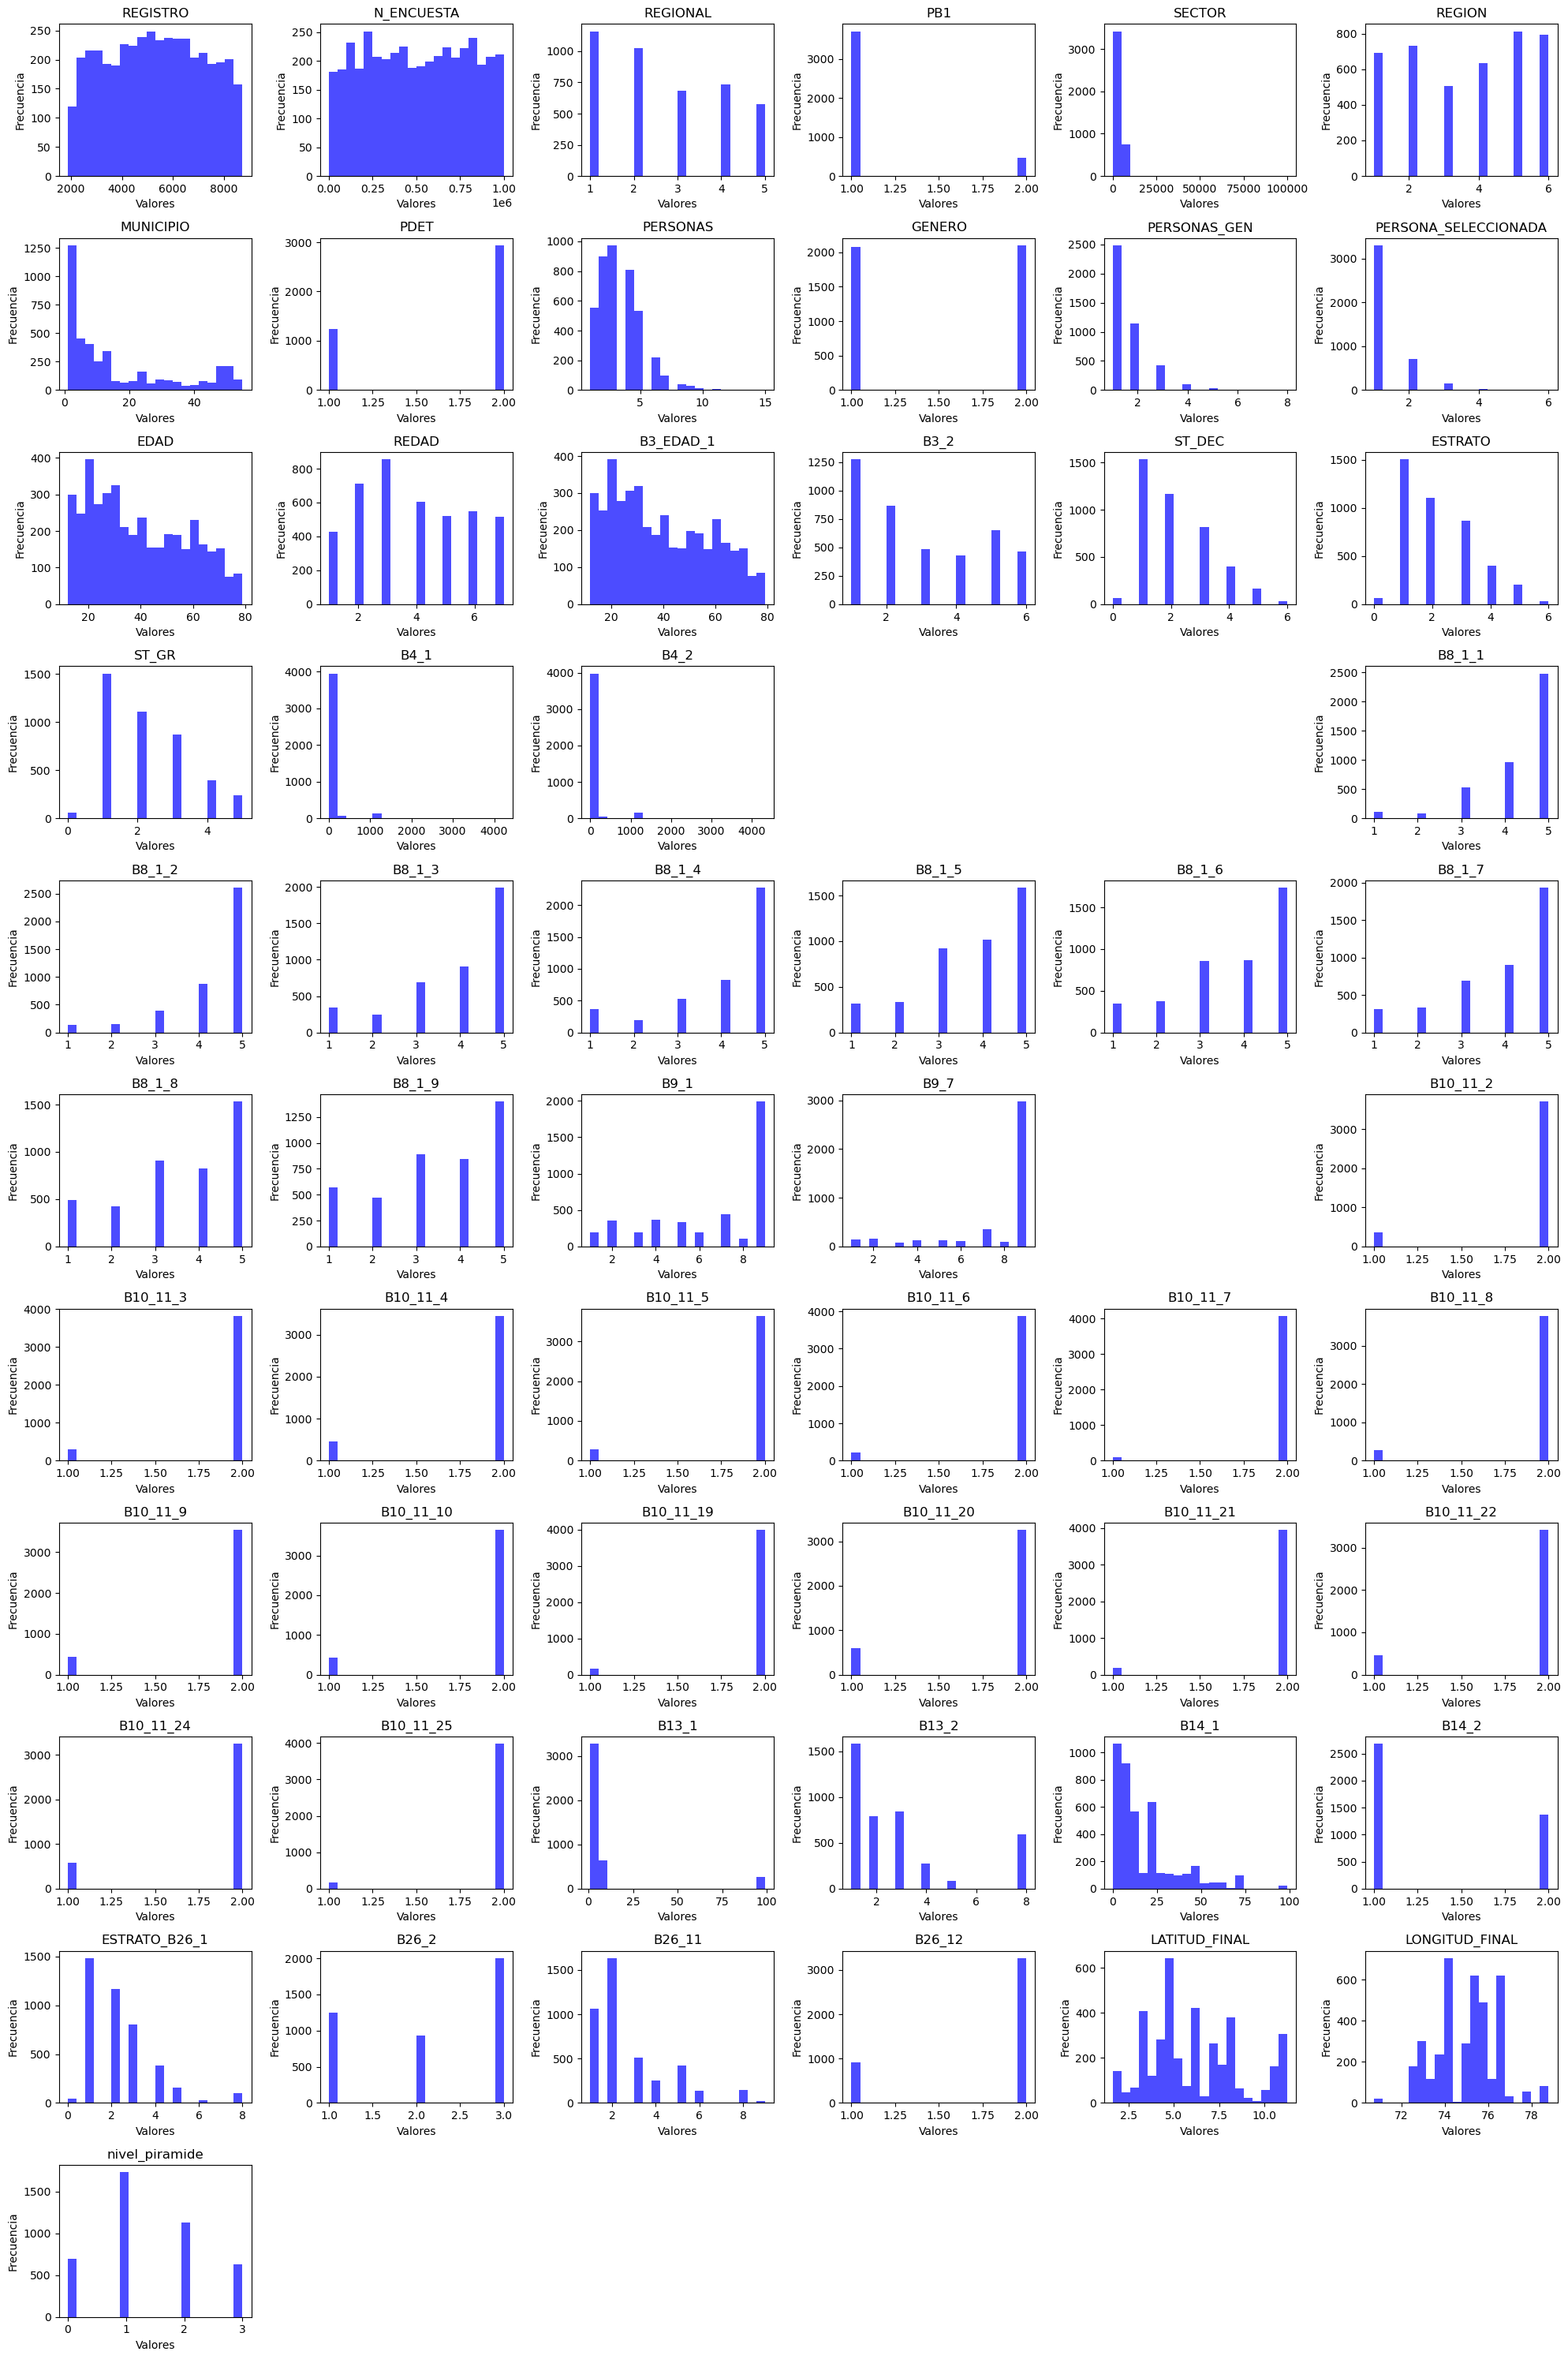

In [24]:
# Crear gráficos de distribución para las variables en el DataFrame
fig, axes = plt.subplots(nrows=11, ncols=6, figsize=(20, 30))
axes = axes.flatten()

# Generar histogramas para las 61 columnas reales
for i, col in enumerate(df.columns[:61]):  # Limitar a las 61 columnas
    if df[col].dtype in ['float64', 'int64']:  # Solo para columnas numéricas
        axes[i].hist(df[col].dropna(), bins=20, alpha=0.7, color='blue')
        axes[i].set_title(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xlabel('Valores')
    else:
        axes[i].set_visible(False)  # Ocultar gráficos para columnas no numéricas

# Ocultar los gráficos adicionales vacíos si hay menos de 66 (11x6)
for j in range(len(df.columns), len(axes)):
    axes[j].set_visible(False)

# Ajustar diseño
plt.tight_layout()
plt.show()


In [26]:
# Identificar las columnas que no son numéricas
columnas_no_numericas = df.select_dtypes(exclude=['float64', 'int64']).columns
df = df.drop(columns=columnas_no_numericas)
df

,REGISTRO,N_ENCUESTA,REGIONAL,PB1,SECTOR,REGION,MUNICIPIO,PDET,PERSONAS,GENERO,...,B13_2,B14_1,B14_2,ESTRATO_B26_1,B26_2,B26_11,B26_12,LATITUD_FINAL,LONGITUD_FINAL,nivel_piramide
0,1877,764678,5,1,526,5,8,2,2,2,...,1,8,2.0,3,3,2,2,7.113764,73.136595,1
1,1885,900989,5,1,5002,5,13,2,2,2,...,3,1,2.0,2,2,5,2,7.892407,72.513830,1
2,1889,968646,5,1,5002,5,13,2,2,2,...,1,8,2.0,2,2,3,2,7.892383,72.513792,0
3,1898,180785,5,1,5006,5,13,2,6,2,...,1,6,1.0,1,3,8,2,7.899648,72.535536,0
4,1901,734690,5,1,5006,5,13,2,3,1,...,3,8,1.0,1,1,2,2,7.897977,72.535518,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,8703,294431,1,1,1,4,32,2,5,1,...,2,3,1.0,3,3,3,2,4.843900,74.066290,2
4175,8723,516103,1,1,1,4,32,2,4,1,...,3,48,1.0,2,2,2,2,4.854580,74.055531,1
4176,8726,405383,1,1,1,4,32,2,5,1,...,3,8,2.0,2,1,4,2,4.857498,74.055302,3
4177,8728,606911,1,1,2,4,32,2,3,2,...,1,3,2.0,2,1,4,2,4.854772,74.054638,1


### <div class="alert-info">  Análisis y Conclusiones para con el problema de negocio

- El DataFrame final se obtuvo tras aplicar un proceso riguroso de selección de variables relevantes y eliminar aquellas columnas con niveles de calidad de datos inferiores al 90%, conforme al criterio acordado por el equipo. Como resultado, se generó un DataFrame compuesto por 58 variables y 4,179 registros, listo para ser analizado.

- Las variables seleccionadas están estrechamente vinculadas al problema de negocio, ya que permiten perfilar de manera efectiva al universo de individuos evaluados. Es importante destacar que, para este análisis, únicamente se consideró a la persona seleccionada de cada hogar, garantizando un enfoque más representativo y pertinente.

- Añadir otros puntos 